In [1]:
import keras
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import load_img
import cv2

Using TensorFlow backend.


In [2]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
from keras.models import model_from_json

In [4]:
model=model_from_json(open('/home/vishnu/my_project_dir/open cv learning/facial_expression_model_structure.json','r').read())
model.load_weights('/home/vishnu/my_project_dir/open cv learning/facial_expression_model_weights.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [5]:
emotions=('angry','disgust','fear','happy','sad','surprise','neutral')

In [52]:
def detect(image):
    image_load=cv2.imread(image)
    gray = cv2.cvtColor(image_load,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    
    pred_list =[]
    
    for (x,y,w,h) in faces:
        cv2.rectangle(image_load,(x,y),(x+w,y+h),(255,0,0),2)
        detected_face=image_load[int(y):int(y+h),int(x):int(x+w)]
        detected_face=cv2.cvtColor(detected_face,cv2.COLOR_BGR2GRAY)
        
        detected_face =cv2.resize(detected_face,(48,48))
        
        img_pixels=keras.preprocessing.image.img_to_array(detected_face)
        img_pixels=np.expand_dims(img_pixels,axis=0)
        img_pixels /=255
        
        predictions=model.predict(img_pixels)
        
        max_index=np.argmax(predictions[0])
        
        
        percentage =round(predictions[0][max_index]*100,2)
        
        emotion=emotions[max_index]
        
        pred_list =[emotion,percentage]
        
        cv2.putText(image_load,emotion,(int(x),int(y)),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
        
    cv2.imshow('Image Prediction',image_load)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return pred_list

In [55]:
pred=detect("jlo.jpg")

In [56]:
pred

['happy', 95.51]

### making inference predictions

In [6]:
from keras.models import model_from_json

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image


In [7]:
model=model_from_json(open("facial_expression_model_structure.json",'r').read())
model.load_weights("facial_expression_model_weights.h5")

In [71]:
def emotion_analysis(emotion):
    objects=('angry','disgust','fear','happy','sad','surprise','neutral')
    
    y_position=np.arange(len(objects))
    
    plt.bar(y_position,emotion,align='center',alpha=0.5)
    plt.xticks(y_position,objects)
    
    plt.ylabel('percentage')
    plt.title('emotion classifier')
    plt.show()

In [60]:
img=image.load_img('jlo.jpg',color_mode='grayscale',target_size=(48,48))


In [61]:
x=keras.preprocessing.image.img_to_array(img)
x=np.expand_dims(x,axis=0)

x/=255


In [62]:
custom_pred=model.predict(x)

In [63]:
custom_pred[0]

array([0.10456069, 0.00516749, 0.27491385, 0.06169217, 0.3456182 ,
       0.04911722, 0.15893039], dtype=float32)

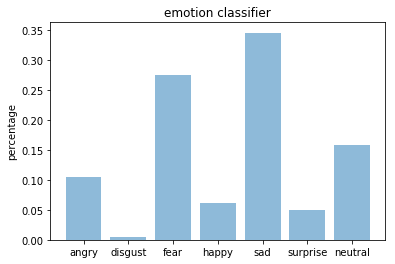

In [72]:
emotion_analysis(custom_pred[0])

### video Analysis

In [31]:
cap=cv2.VideoCapture(0)
frame=0

while(True):
    ret,img=cap.read()
    #img=cv2.resize(img,(640,360))
    img=img[0:308,:]
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        if w>130:
            detected_face=img[int(y):int(y+h),int(x):int(x+w)]
            detected_face=cv2.cvtColor(detected_face,cv2.COLOR_BGR2GRAY)
            detected_face=cv2.resize(detected_face,(48,48))
            
            
            img_pixels=keras.preprocessing.image.img_to_array(detected_face)
            img_pixels=np.expand_dims(img_pixels,axis=0)
            img_pixels /=255
            
            predictions=model.predict(img_pixels)
            max_index=np.argmax(predictions[0])
            
            overlay = img.copy()
            opacity =0.4
            cv2.rectangle(img,(x+w+10,y-25),(x+w+150,y+115),(64,64,64),cv2.FILLED)
            cv2.addWeighted(overlay,opacity,img,1-opacity,0,img)
            cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255,255,255),1)
            cv2.line(img,((x+w),y-20),(x+w+10,y-20),(255,255,255),1)
            
            
            emotion=""
            for i in range(len(predictions[0])):
                emotion="%s %s%s"%(emotions[i],round(predictions[0][i]*100,2),'%')
                
                if i!=max_index:
                    color=(255,0,0)
                    
                color =(255,255,255)
                cv2.putText(img,emotion,(int(x+w+15),int(y-12+i*20)),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1)
                
    cv2.imshow('img',img)
    frame=frame+1
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        
        
cap.release()
cv2.destroyAllWindows()